In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

from itertools import combinations

import researchpy as rp

plt.rcParams['figure.figsize'] = (10, 5)
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("../data/regresion_lineal/supermarket_2.pkl")

In [3]:
df.head()

,city,customer_type,gender,product_line,unit_price,quantity,total,date,time,payment,rating,month,shift
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,9.1,January,Morning
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,9.6,March,Morning
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,7.4,March,Morning
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33,Ewallet,8.4,January,Afternoon
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,5.3,February,Morning


ShapiroResult(statistic=0.9087592959403992, pvalue=5.303152934088987e-24)


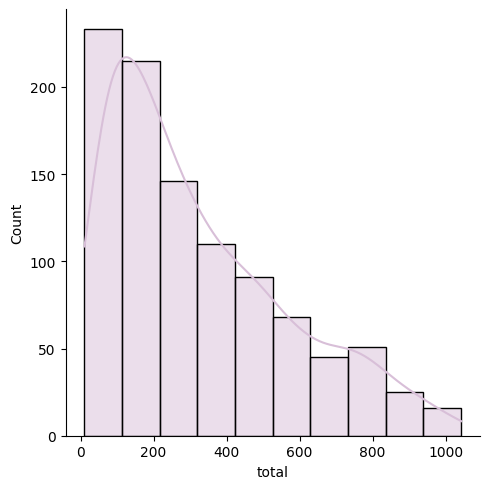

In [4]:
# EVALUACIÓN DE ASUNCIONES: Cada asunción la deberéis testar de forma visual y analítica.

# NORMALIDAD:
#Visual
print (stats.shapiro(df["total"]))
sns.displot(df["total"], kde = True, color = "thistle", bins=10);

In [5]:
#Analítica
#nuestros datos tienen un p-value menos de 0.05 por lo que no son normales.
stats.shapiro(df["total"])

ShapiroResult(statistic=0.9087592959403992, pvalue=5.303152934088987e-24)

#### Homocedasticidad

<Axes: xlabel='city', ylabel='total'>

<Axes: xlabel='customer_type', ylabel='total'>

<Axes: xlabel='gender', ylabel='total'>

<Axes: xlabel='product_line', ylabel='total'>

<Axes: xlabel='payment', ylabel='total'>

<Axes: xlabel='quantity', ylabel='total'>

<Axes: xlabel='month', ylabel='total'>

<Axes: xlabel='shift', ylabel='total'>

Text(0.5, 1.0, 'Variables predictivas homocedasticidad')

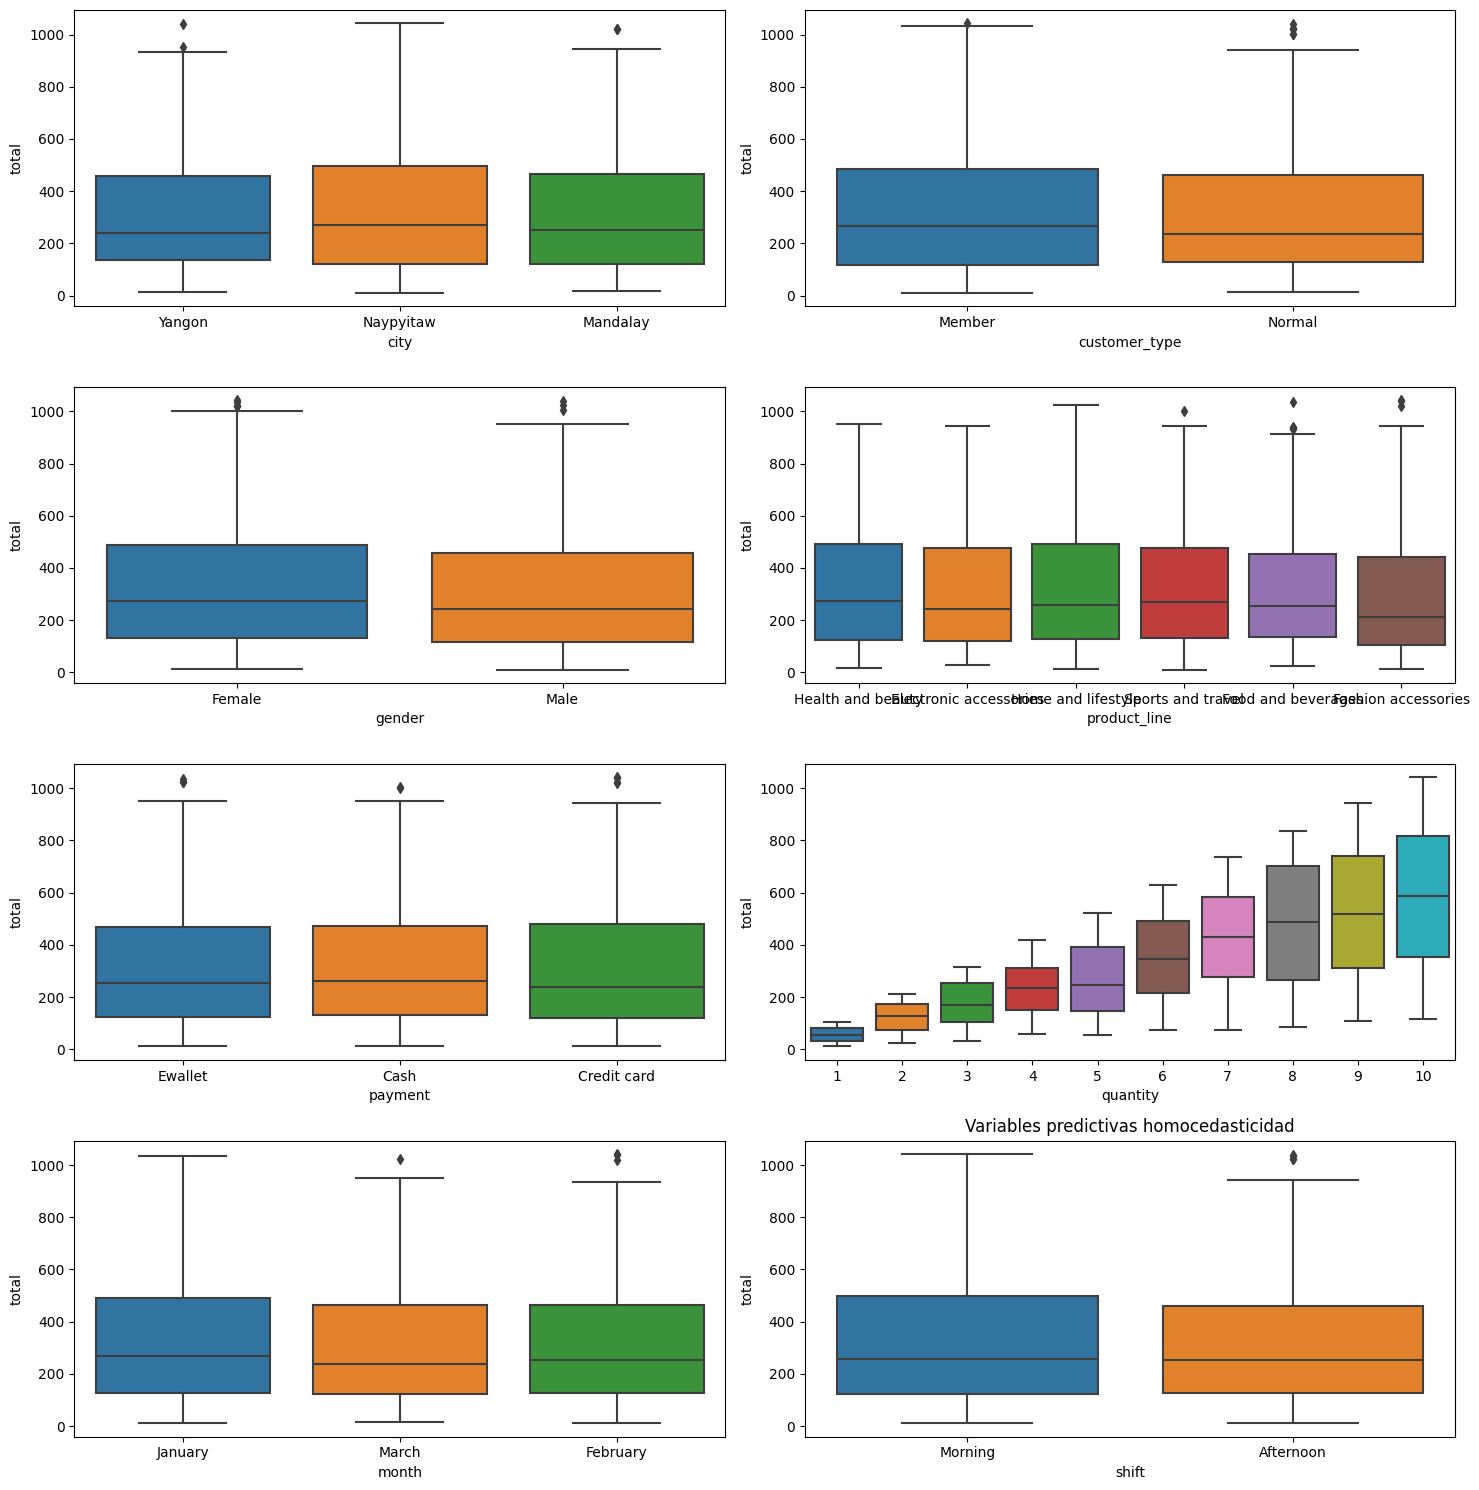

In [6]:
#Visual

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flat

lista_super = ['city', 'customer_type', 'gender', 'product_line',  'payment', 'quantity', 'month', 'shift']

for indice, elemento in enumerate(lista_super):
    sns.boxplot(x = elemento, y = 'total', data = df, ax=axes[indice], palette = 'tab10')

plt.title('Variables predictivas homocedasticidad')

plt.tight_layout()
plt.show()

<Axes: xlabel='unit_price', ylabel='total'>

<Axes: xlabel='rating', ylabel='total'>

Text(0.5, 1.0, 'Variables predictivas numéricas homocedasticidad')

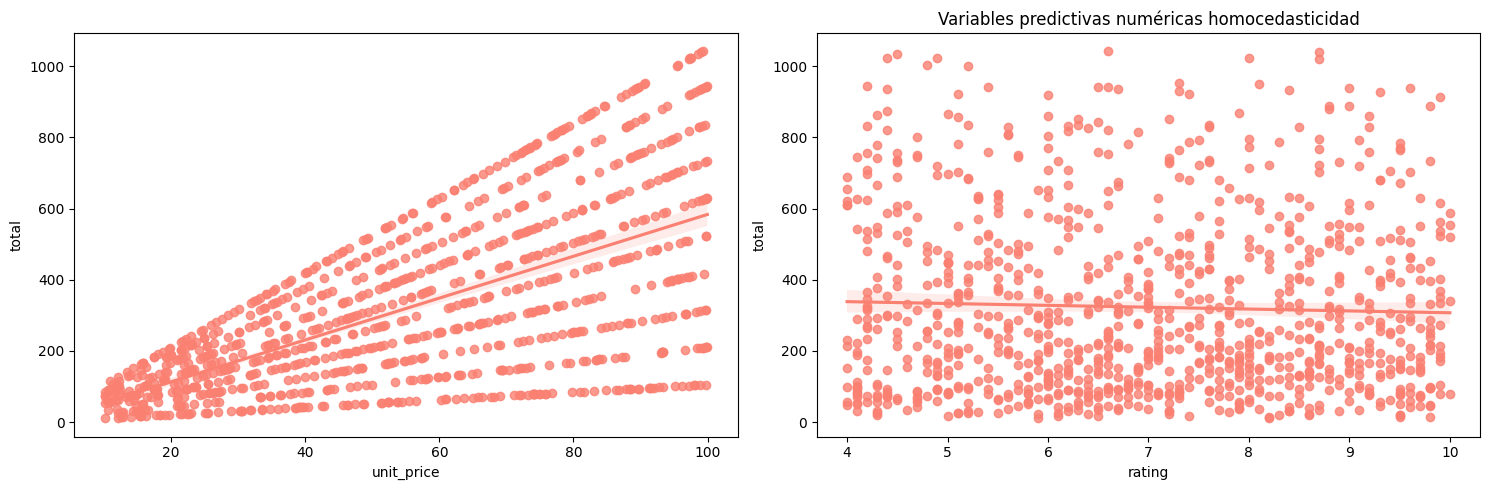

In [7]:
#Visual

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flat

lista_super_num = ['unit_price','rating']

for indice, elemento in enumerate(lista_super_num):
    sns.regplot(x = elemento, y = 'total', data = df, ax=axes[indice], color = "salmon")

plt.title('Variables predictivas numéricas homocedasticidad')

plt.tight_layout()
plt.show()

De manera visual podemos observar que nuestras variables categóricas son homocedásticas, a excepción de la variable "quantity".

En cambio, en nuestras variables numéricas sólo la variable "unit_price" no es homocedástica.

In [8]:
#Analítica
#Test de Levene, elegimos este método ya que nuestros datos no son normales.

In [9]:
#creamos una lista vacía
lista_df =[]

#sacamos un df por cada tipo de product_line que tenemos, y nos quedamos solamente con la columna quantity, y metemos estos df dentro de una lista.
for elemento in df["product_line"].unique():
    df1 = df[df["product_line"] == elemento ]['total']
    lista_df.append(df1)

In [10]:
#pasamos el test de Levene para cada categoría de product_line
levene_test = stats.levene(lista_df[0], lista_df[1], lista_df[2], lista_df[3], lista_df[4], lista_df[5], center='median')
levene_test

LeveneResult(statistic=0.18201468318342898, pvalue=0.9694180536193773)

El p-value es mayor de 0.05, lo que nos indica que la relación entre el total y la línea de producto es homocedástica. 

In [11]:
def subcategorias (df, col):

    """esta función nos devuelve la columna total separada por los valores unicos de la columna indicada

    Args:
        df (dataframe): conjunto de datos
        col: columna del conjunto de datos 

    Returns:
        lista: devuelve una lista con los df 
    """
    lista_df =[]

    for elemento in df[col].unique():
        df1 = df[df[col] == elemento ]['total']
        lista_df.append(df1)
        
    return lista_df

In [12]:
city = subcategorias(df, "city")
levene_test = stats.levene(city[0], city[1], city[2], center='median')
levene_test

LeveneResult(statistic=2.419770080100636, pvalue=0.08946425577002974)

Entre las variables total y city, también hay homocedasticidad porque el valor es mayor a 0.05

In [13]:
customer = subcategorias(df, "customer_type")
levene_test = stats.levene(customer[0], customer[1], center='median')
levene_test

LeveneResult(statistic=0.3379592132814284, pvalue=0.5611408477600044)

Entre las variables total y customer_type el valor también es mayor a 0.05 por lo que existe homocedasticidad

In [14]:
gender = subcategorias(df, "gender")
levene_test = stats.levene(gender[0], gender[1], center='median')
levene_test

LeveneResult(statistic=0.9054791899266308, pvalue=0.34154716602764346)

Entre las variables total y gender el valor también es mayor a 0.05 por lo que existe homocedasticidad

In [15]:
quantity = subcategorias(df, "quantity")

levene_test = stats.levene(quantity[0], quantity[1], quantity[2], quantity[3], quantity[4], quantity[5], quantity[6], quantity[7], quantity[8], quantity[9],center='median')
levene_test

LeveneResult(statistic=78.39976229161954, pvalue=2.336681448212872e-109)

Entre las variables total y quantity, también hay homocedasticidad porque el valor es mayor a 0.05

In [16]:
payment = subcategorias(df, "payment")
levene_test = stats.levene(payment[0], payment[1], payment[2], center='median')
levene_test

LeveneResult(statistic=0.5125358011628091, pvalue=0.5991325030539134)

Entre las variables total y payment, también hay homocedasticidad porque el valor es mayor a 0.05

In [17]:
month = subcategorias(df, "month")
levene_test = stats.levene(month[0], month[1], month[2], center='median')
levene_test

LeveneResult(statistic=0.22547438296361144, pvalue=0.7981781932388169)

Entre las variables total y month, también hay homocedasticidad porque el valor es mayor a 0.05

In [18]:
shift = subcategorias(df, "shift")
levene_test = stats.levene(shift[0], shift[1], center='median')
levene_test

LeveneResult(statistic=1.6524662061572402, pvalue=0.19892180927787423)

Entre las variables total y shift, también hay homocedasticidad porque el valor es mayor a 0.05

In [19]:
stats.levene(df["unit_price"], df.total, center='median')


LeveneResult(statistic=1088.034755927951, pvalue=7.261819558154851e-191)

In [20]:
stats.levene(df["rating"], df.total, center='median')

LeveneResult(statistic=1385.3977265045248, pvalue=8.248082173683168e-231)

Ambas columnas numéricas (unit_price y rating) no son homocedásticas, ya que su p-value está muy por debajo de 0.05, a pesar de que visualmente podíamos pensar que rating sí era homocedástica.

#### Independencia

In [21]:
#Analítica (Test chi-cuadrado)

crosstab, test_results, expected = rp.crosstab(df["customer_type"], df["gender"],
                                            test= "chi-square",
                                            expected_freqs= True,
                                            prop= "cell")

In [22]:
crosstab.head()

gender             
gender        Female  Male    All
customer_type                    
Member          26.1  24.0   50.1
Normal          24.0  25.9   49.9
All             50.1  49.9  100.0

Según los resultados, el p-value es mayor de 0.05, lo que indica que nuestras variables son independientes.
Basándonos en los resultados de Cramer's phi, el valor es muy cercano a 0, lo que indica igualmente que nuestras variables son independientes.

In [25]:
# generamos un df con las variables predictoras que nos dan información:

predictoras = df.select_dtypes(include = 'object')
predictoras = predictoras.drop(['time'], axis = 1)
predictoras.head(1)

,city,customer_type,gender,product_line,payment,month,shift
0,Yangon,Member,Female,Health and beauty,Ewallet,January,Morning


In [26]:
# creamos una lista con todas las combinaciones posibles que existen entre las columnas paras generar el crosstab:

combinaciones = list(combinations(predictoras, 2))

In [30]:
for i in combinaciones:
    rp.crosstab(df[i[0]], df[i[1]], prop = "row")

customer_type              
customer_type        Member Normal    All
city                                     
Mandalay              49.70  50.30  100.0
Naypyitaw             51.52  48.48  100.0
Yangon                49.12  50.88  100.0
All                   50.10  49.90  100.0

gender              
gender    Female   Male    All
city                          
Mandalay   48.80  51.20  100.0
Naypyitaw  54.27  45.73  100.0
Yangon     47.35  52.65  100.0
All        50.10  49.90  100.0

product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
city                                                                         
Mandalay                      16.57               18.67              15.06   
Naypyitaw                     16.77               19.82              20.12   
Yangon                        17.65               15.00              17.06   
All                           17.00               17.80              17.40   

                                                                            
product_line Health and beauty Home and lifestyle Sports and travel    All  
city                                                                        
Mandalay                 15.96              15.06             18.67  100.0  
Naypyitaw                15.85              13.72             13.72  100.0  
Yangon                   13.82              19.12             17.35  100.0  
All                      15.20              16.00             16.60  100.0

payment                           
payment      Cash Credit card Ewallet    All
city                                        
Mandalay    33.13       32.83   34.04  100.0
Naypyitaw   37.80       29.88   32.32  100.0
Yangon      32.35       30.59   37.06  100.0
All         34.40       31.10   34.50  100.0

month                      
month     February January  March    All
city                                    
Mandalay     32.83   33.43  33.73  100.0
Naypyitaw    30.49   37.20  32.32  100.0
Yangon       27.65   35.00  37.35  100.0
All          30.30   35.20  34.50  100.0

shift               
shift     Afternoon Morning    All
city                              
Mandalay      54.22   45.78  100.0
Naypyitaw     53.66   46.34  100.0
Yangon        52.35   47.65  100.0
All           53.40   46.60  100.0

gender             
gender        Female  Male    All
customer_type                    
Member          52.1  47.9  100.0
Normal          48.1  51.9  100.0
All             50.1  49.9  100.0

product_line                                         \
product_line  Electronic accessories Fashion accessories Food and beverages   
customer_type                                                                 
Member                         15.57               17.17              18.76   
Normal                         18.44               18.44              16.03   
All                            17.00               17.80              17.40   

                                                                             
product_line  Health and beauty Home and lifestyle Sports and travel    All  
customer_type                                                                
Member                    14.57              16.57             17.37  100.0  
Normal                    15.83              15.43             15.83  100.0  
All                       15.20              16.00             16.60  100.0

payment                           
payment          Cash Credit card Ewallet    All
customer_type                                   
Member          33.53       34.33   32.14  100.0
Normal          35.27       27.86   36.87  100.0
All             34.40       31.10   34.50  100.0

month                      
month         February January  March    All
customer_type                               
Member           32.53   34.33  33.13  100.0
Normal           28.06   36.07  35.87  100.0
All              30.30   35.20  34.50  100.0

shift               
shift         Afternoon Morning    All
customer_type                         
Member            53.89   46.11  100.0
Normal            52.91   47.09  100.0
All               53.40   46.60  100.0

product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
gender                                                                       
Female                        16.77               19.16              17.96   
Male                          17.23               16.43              16.83   
All                           17.00               17.80              17.40   

                                                                            
product_line Health and beauty Home and lifestyle Sports and travel    All  
gender                                                                      
Female                   12.77              15.77             17.56  100.0  
Male                     17.64              16.23             15.63  100.0  
All                      15.20              16.00             16.60  100.0

payment                           
payment    Cash Credit card Ewallet    All
gender                                    
Female    35.53       32.53   31.94  100.0
Male      33.27       29.66   37.07  100.0
All       34.40       31.10   34.50  100.0

month                      
month  February January  March    All
gender                               
Female    32.73   35.13  32.14  100.0
Male      27.86   35.27  36.87  100.0
All       30.30   35.20  34.50  100.0

shift               
shift  Afternoon Morning    All
gender                         
Female     49.10   50.90  100.0
Male       57.72   42.28  100.0
All        53.40   46.60  100.0

payment                           
payment                   Cash Credit card Ewallet    All
product_line                                             
Electronic accessories   41.76       27.06   31.18  100.0
Fashion accessories      32.02       31.46   36.52  100.0
Food and beverages       32.76       35.06   32.18  100.0
Health and beauty        32.24       32.89   34.87  100.0
Home and lifestyle       31.87       28.12   40.00  100.0
Sports and travel        35.54       31.93   32.53  100.0
All                      34.40       31.10   34.50  100.0

month                      
month                  February January  March    All
product_line                                         
Electronic accessories    31.76   31.76  36.47  100.0
Fashion accessories       33.71   35.96  30.34  100.0
Food and beverages        35.63   32.18  32.18  100.0
Health and beauty         30.26   32.24  37.50  100.0
Home and lifestyle        23.75   36.88  39.38  100.0
Sports and travel         25.90   42.17  31.93  100.0
All                       30.30   35.20  34.50  100.0

shift               
shift                  Afternoon Morning    All
product_line                                   
Electronic accessories     54.12   45.88  100.0
Fashion accessories        54.49   45.51  100.0
Food and beverages         60.92   39.08  100.0
Health and beauty          49.34   50.66  100.0
Home and lifestyle         48.75   51.25  100.0
Sports and travel          51.81   48.19  100.0
All                        53.40   46.60  100.0

month                      
month       February January  March    All
payment                                   
Cash           32.56   35.47  31.98  100.0
Credit card    28.94   36.33  34.73  100.0
Ewallet        29.28   33.91  36.81  100.0
All            30.30   35.20  34.50  100.0

shift               
shift       Afternoon Morning    All
payment                             
Cash            50.87   49.13  100.0
Credit card     54.34   45.66  100.0
Ewallet         55.07   44.93  100.0
All             53.40   46.60  100.0

shift               
shift    Afternoon Morning    All
month                            
February     53.47   46.53  100.0
January      51.14   48.86  100.0
March        55.65   44.35  100.0
All          53.40   46.60  100.0

In [ ]:
for i in combinaciones:
        crosstab, test_results = rp.crosstab(df[i[0]], df[i[1]],
                                        test= "chi-square",
                                        prop= "cell")
        display(crosstab)
        print(test_results)

customer_type              
customer_type        Member Normal    All
city                                     
Mandalay               16.5   16.7   33.2
Naypyitaw              16.9   15.9   32.8
Yangon                 16.7   17.3   34.0
All                    50.1   49.9  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.4188
1                    p-value =    0.8111
2                 Cramer's V =    0.0205


gender             
gender    Female  Male    All
city                         
Mandalay    16.2  17.0   33.2
Naypyitaw   17.8  15.0   32.8
Yangon      16.1  17.9   34.0
All         50.1  49.9  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    3.5320
1                    p-value =    0.1710
2                 Cramer's V =    0.0594


product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
city                                                                         
Mandalay                        5.5                 6.2                5.0   
Naypyitaw                       5.5                 6.5                6.6   
Yangon                          6.0                 5.1                5.8   
All                            17.0                17.8               17.4   

                                                                            
product_line Health and beauty Home and lifestyle Sports and travel    All  
city                                                                        
Mandalay                   5.3                5.0               6.2   33.2  
Naypyitaw                  5.2                4.5               4.5   32.8  
Yangon                     4.7                6.5               5.9   34.0  
All                       15.2               16.0              16.6  100.0

                 Chi-square test  results
0  Pearson Chi-square ( 10.0) =   11.5594
1                     p-value =    0.3156
2                  Cramer's V =    0.0760


payment                           
payment      Cash Credit card Ewallet    All
city                                        
Mandalay     11.0        10.9    11.3   33.2
Naypyitaw    12.4         9.8    10.6   32.8
Yangon       11.0        10.4    12.6   34.0
All          34.4        31.1    34.5  100.0

                Chi-square test  results
0  Pearson Chi-square ( 4.0) =    3.2997
1                    p-value =    0.5090
2                 Cramer's V =    0.0406


gender             
gender        Female  Male    All
customer_type                    
Member          26.1  24.0   50.1
Normal          24.0  25.9   49.9
All             50.1  49.9  100.0

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.5997
1                    p-value =    0.2059
2               Cramer's phi =    0.0400


product_line                                         \
product_line  Electronic accessories Fashion accessories Food and beverages   
customer_type                                                                 
Member                           7.8                 8.6                9.4   
Normal                           9.2                 9.2                8.0   
All                             17.0                17.8               17.4   

                                                                             
product_line  Health and beauty Home and lifestyle Sports and travel    All  
customer_type                                                                
Member                      7.3                8.3               8.7   50.1  
Normal                      7.9                7.7               7.9   49.9  
All                        15.2               16.0              16.6  100.0

                Chi-square test  results
0  Pearson Chi-square ( 5.0) =    3.3250
1                    p-value =    0.6500
2                 Cramer's V =    0.0577


payment                           
payment          Cash Credit card Ewallet    All
customer_type                                   
Member           16.8        17.2    16.1   50.1
Normal           17.6        13.9    18.4   49.9
All              34.4        31.1    34.5  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    5.2170
1                    p-value =    0.0736
2                 Cramer's V =    0.0722


product_line                                         \
product_line Electronic accessories Fashion accessories Food and beverages   
gender                                                                       
Female                          8.4                 9.6                9.0   
Male                            8.6                 8.2                8.4   
All                            17.0                17.8               17.4   

                                                                            
product_line Health and beauty Home and lifestyle Sports and travel    All  
gender                                                                      
Female                     6.4                7.9               8.8   50.1  
Male                       8.8                8.1               7.8   49.9  
All                       15.2               16.0              16.6  100.0

                Chi-square test  results
0  Pearson Chi-square ( 5.0) =    5.7445
1                    p-value =    0.3319
2                 Cramer's V =    0.0758


payment                           
payment    Cash Credit card Ewallet    All
gender                                    
Female     17.8        16.3    16.0   50.1
Male       16.6        14.8    18.5   49.9
All        34.4        31.1    34.5  100.0

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.9497
1                    p-value =    0.2288
2                 Cramer's V =    0.0543


payment                           
payment                   Cash Credit card Ewallet    All
product_line                                             
Electronic accessories     7.1         4.6     5.3   17.0
Fashion accessories        5.7         5.6     6.5   17.8
Food and beverages         5.7         6.1     5.6   17.4
Health and beauty          4.9         5.0     5.3   15.2
Home and lifestyle         5.1         4.5     6.4   16.0
Sports and travel          5.9         5.3     5.4   16.6
All                       34.4        31.1    34.5  100.0

                 Chi-square test  results
0  Pearson Chi-square ( 10.0) =    8.7214
1                     p-value =    0.5587
2                  Cramer's V =    0.0660


Analizando las diferentes crosstab, observamos que todas nuestras variable categóricas son independientes entre sí ya que en el test de Cramer tienen valores muy cercanos a 0.